In [ ]:
# # 47p - 105p

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

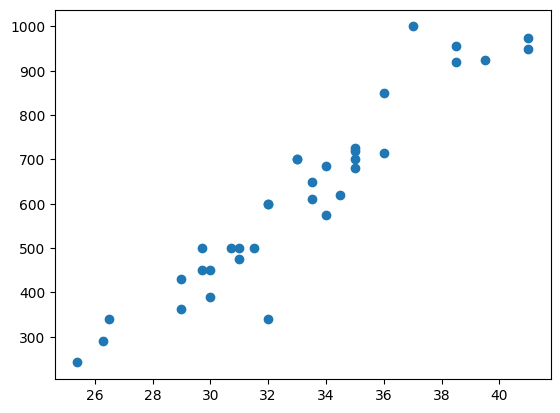

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(bream_length,bream_weight)
plt.show()

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

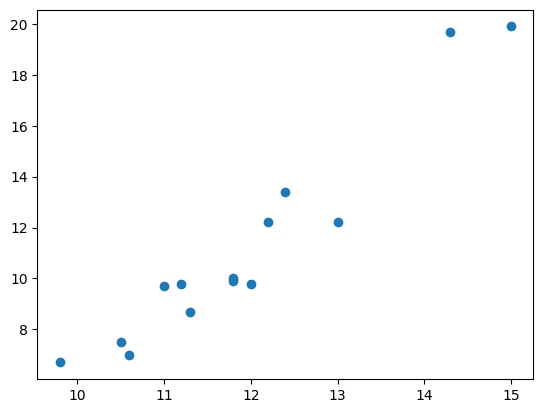

In [ ]:
plt.scatter(smelt_length,smelt_weight)
plt.show()

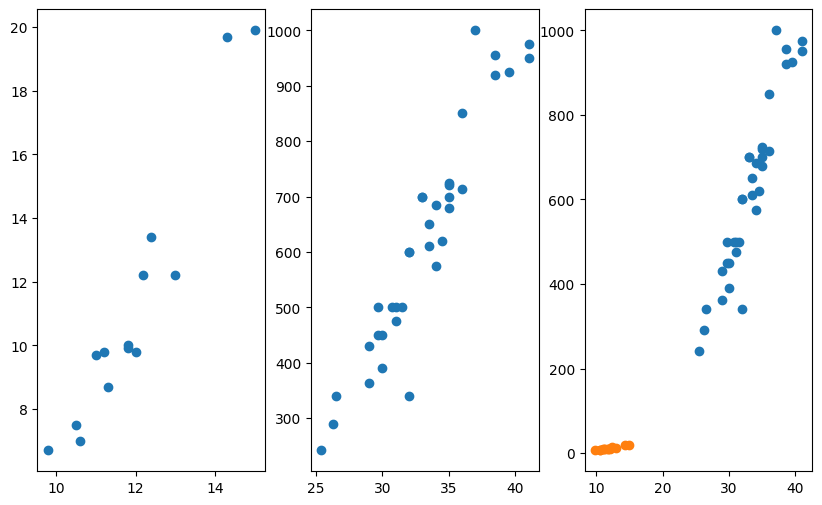

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1,3,1)
plt.scatter(smelt_length,smelt_weight)
plt.subplot(1,3,2)
plt.scatter(bream_length,bream_weight)
plt.subplot(1,3,3)
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.show()

데이터 준비 확보
* 두종류의 데이터
*길이, 무게:[길이, 무게]

In [ ]:
# 학습 데이터 : 지도 학습-정답을 인지하고(정답을 준비하고) 실행
# 비지도 학습 - 정답 없이
# 중지도 학습 - 일부는 정답이 있고 일부는 정답이 없음, 정답이 없는 부분을 인공지능으로 채움
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
fish_data = list(zip(length,weight))
fish_data[:5]

[(25.4, 242.0), (26.3, 290.0), (26.5, 340.0), (29.0, 363.0), (29.0, 430.0)]

In [ ]:
# 도미 : 1 방어:0 ==> 이진분류
fish_target =[1]*len(bream_length) + [0]*len(smelt_length)
fish_target[:5]

[1, 1, 1, 1, 1]

In [ ]:
# 사이킷 런 - k최근접 이웃 : 분류 - 예측(결과값 조절로 같은 알고리즘 상)
# 가까운 그룹끼리 같은 것이라고 예
# fit - 모델 훈련(학습)
# score - 모델 평가 (1.0은 100%)항상 백분율로 나타냄

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)    # 주어진 데이터로 알고리즘을 훈련
# 데이터 분할 없이 전부 학습
kn.score(fish_data, fish_target) # 정확도 1.0 --> 100%

1.0

- 예측
 - predict : 새로운 데이터의 정답을 예측


In [ ]:
# 예측 : 도미가 1
kn.predict([[30,600]]) # ()안에 2차원 리스트를 포함

array([1])

In [ ]:
# 무조건 도미
kn49 = KNeighborsClassifier(n_neighbors=49) #
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
print(35/49) # 35가 도미. 전체에서 도미가 나올 확률(모든 조건이 같다는 가정 하에)

0.7142857142857143


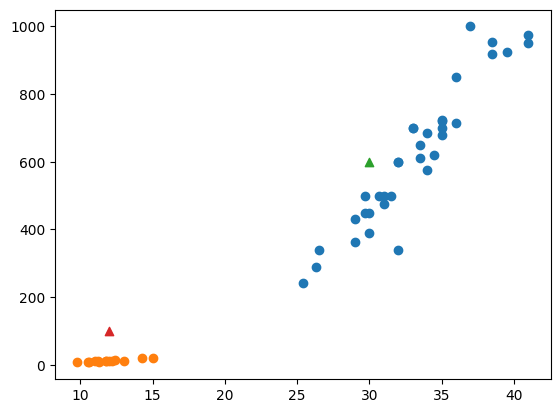

In [ ]:
# 미지의 데이터 30,600 -->2차원   [(30,60)]
# [(),(),()] 2차원
sample = [(30,60),(12,100)]
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30,600,marker = "^")
plt.scatter(12,100,marker = "^")
plt.show()

In [ ]:
kn.predict(sample)

array([0, 0])

- but neighbors를 전체 개수로 하면?

In [ ]:
kn49=KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target),len(bream_length)/49 , f'결론은 무조건 도미를 판단'

(0.7142857142857143, 0.7142857142857143, '결론은 무조건 도미를 판단')

- 최적의 n_neighbors의 값은 어떻게 될까
- n_neighbors가 얼마 일때 결과가 1이 아닐까?

In [ ]:
kn=KNeighborsClassifier(n_neighbors=49)     # 18부터 1이 아니기 시작
kn.fit(fish_data,fish_target)
kn.score(fish_data,fish_target)

0.7142857142857143

In [ ]:
for i in  range(len(fish_target)):
  model = KNeighborsClassifier(n_neighbors=18).fit(fish_data,fish_target)
  score = model.score(fish_data,fish_target)
  if score != 1.0:
    print(i+1,score)
    break

1 0.9795918367346939


In [ ]:
# 정답이 아니라고 분류한 데이터 찾기
# 같지 않은 것의 인덱스를 찾아야함
find_list = []
fish_predict = model.predict(fish_data)
for i in range(len(fish_target)):
  if fish_predict[i] != fish_target[i]:
    find_list.append(i)

In [ ]:
find_list

[0]

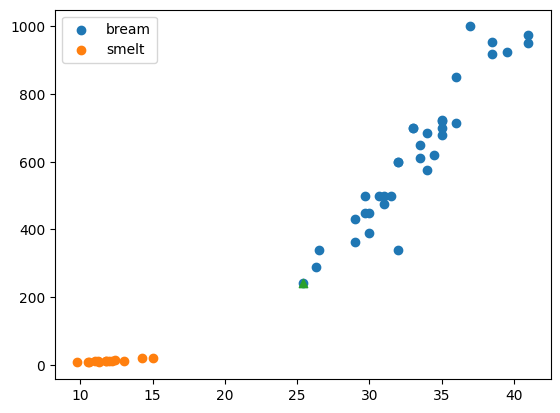

In [ ]:
plt.scatter(bream_length,bream_weight,label='bream')
plt.scatter(smelt_length,smelt_weight,label='smelt')
plt.scatter(fish_data[0][0],fish_data[0][1],marker = "^")
plt.legend()
plt.show()

In [ ]:
# 18개의 이웃데이터가 어떤 데이터인지 확인
fish_data[find_list[0]]

(25.4, 242.0)

In [ ]:
#18개의 이웃데이터가 어떤 데이터인지 확인
import numpy as np
distance, indexs = model.kneighbors([fish_data[find_list[0]]])
np.array(fish_data)[indexs].shape

(1, 18, 2)

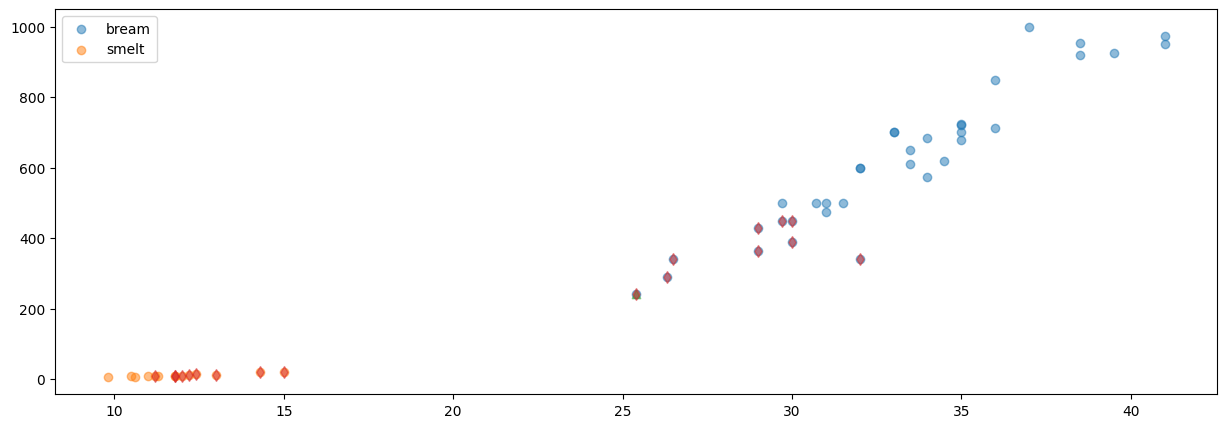

In [ ]:
# 18개의 이웃데이터가 어떤 데이터인지 확인
import numpy as np
worng_data = fish_data[find_list[0]]
distance, indexs = model.kneighbors([worng_data])
# np.array(fish_data)[indexs].reshape(18,2)   # (1,18,2)  --> (18,2)
ref_data =  np.squeeze(np.array(fish_data)[indexs],axis=0) # 맨 앞에 차수를 없애줌
plt.figure(figsize=(15,5))
plt.scatter(bream_length,bream_weight,label='bream',alpha=0.5)
plt.scatter(smelt_length,smelt_weight,label='smelt',alpha=0.5)
plt.scatter(worng_data[0],worng_data[1],marker="^",alpha=0.5)
plt.scatter(ref_data[:,0],ref_data[:,1],marker="d",alpha=0.5)
plt.legend()
plt.show()

예측을 확률로 바꾸면 분류

# 샘플링 편향

In [ ]:
# 도미가 훨씬 많으므로 편향된 데이터
# 처음부터 차이가 나는 경우도 있음 : up / down

# 데이터 섞고
# 7:3의 비율로 train/test 데이터 분류
# 학습용 데이터와 테스트용 데이터를 시각화해서 잘섞였는지 확인
# train데이터 학습
# 학습에 참여하지 않은 test데이터 성능 측정하기

# - 1~5번까지의 과정을 chat gpt를 이용하여 코드만들고 확인하기

In [ ]:
import random
# 데이터 포인트와 레이블을 튜플 형태로 결합
combined = list(zip(fish_data, fish_target))

# 결합된 리스트를 섞음
random.shuffle(combined)

# 다시 데이터 포인트와 레이블을 분리
data_points, labels = zip(*combined)
# 전체 데이터 길이의 70%에 해당하는 지점을 계산
split_point = int(len(data_points) * 0.7)

# 전체 데이터 세트를 sample이라고
# 학습용 데이터 세트를 구성 (70%)
train_data_points = data_points[:split_point]
train_labels = labels[:split_point]

# 테스트용 데이터 세트를 구성 (30%)
test_data_points = data_points[split_point:]
test_labels = labels[split_point:]

# 결과 확인
print("Training Data Points:", len(train_data_points))
print("Training Labels:", len(train_labels))
print("Test Data Points:", len(test_data_points))
print("Test Labels:", len(test_labels))

Training Data Points: 34
Training Labels: 34
Test Data Points: 15
Test Labels: 15


In [ ]:
# 넘파이 사용해서 무작위 결과 만들기
np.random.seed(42)      # seed() 넘파이에서 난수 생성을 위한 정수 초깃값 지정
np_index = np.arange(49)      # arange() 일정 간격 / 실수 배열 생성.
np.random.shuffle(np_index)     # shuffle() 주어진 배열을 랜덤하게 섞음.다차원일 경우 첫번쨰 축에서만
print(np_index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


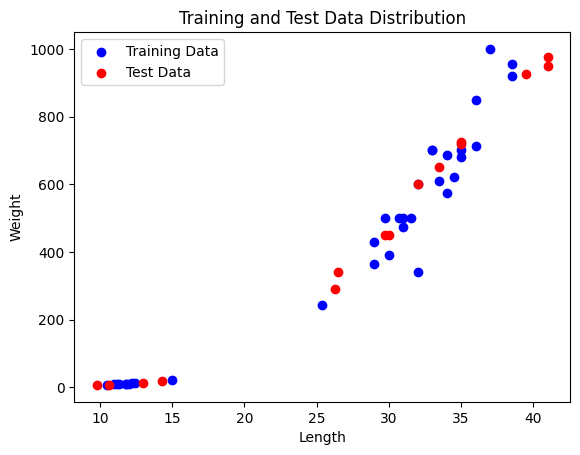

In [ ]:
# 첫번째 머신러닝 프로그램

import matplotlib.pyplot as plt

# 학습 데이터 시각화
plt.scatter([point[0] for point in train_data_points], [point[1] for point in train_data_points], color='blue', label='Training Data')

# 테스트 데이터 시각화
plt.scatter([point[0] for point in test_data_points], [point[1] for point in test_data_points], color='red', label='Test Data')

plt.title('Training and Test Data Distribution')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

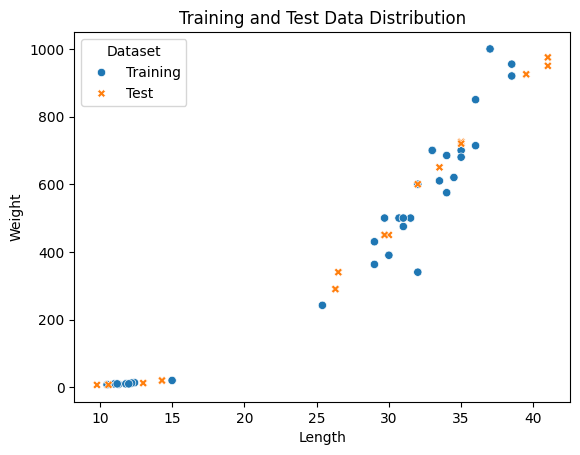

In [ ]:
import seaborn as sns
import pandas as pd

# 데이터와 레이블을 pandas DataFrame으로 변환
train_df = pd.DataFrame(train_data_points, columns=['Length', 'Weight'])
train_df['Dataset'] = 'Training'
test_df = pd.DataFrame(test_data_points, columns=['Length', 'Weight'])
test_df['Dataset'] = 'Test'

# 두 DataFrame을 하나로 합침
combined_df = pd.concat([train_df, test_df])

# seaborn으로 시각화
sns.scatterplot(data=combined_df, x='Length', y='Weight', hue='Dataset', style='Dataset')

plt.title('Training and Test Data Distribution')
plt.show()

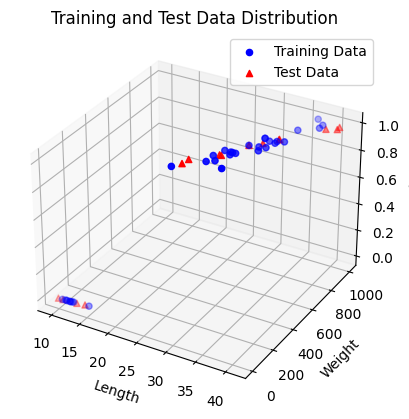

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3차원 플롯 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 학습용 데이터 시각화
train_lengths = [point[0] for point in train_data_points]
train_weights = [point[1] for point in train_data_points]
train_labels = train_labels
ax.scatter(train_lengths, train_weights, train_labels, c='b', marker='o', label='Training Data')

# 테스트용 데이터 시각화
test_lengths = [point[0] for point in test_data_points]
test_weights = [point[1] for point in test_data_points]
test_labels = test_labels
ax.scatter(test_lengths, test_weights, test_labels, c='r', marker='^', label='Test Data')

ax.set_xlabel('Length')
ax.set_ylabel('Weight')
ax.set_zlabel('Label')
ax.set_title('Training and Test Data Distribution')
ax.legend()

plt.show()

In [ ]:
# 두번째 머신러닝 프로그램

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNeighborsClassifier 객체 생성 (이웃의 수는 3으로 설정)
knn_clf = KNeighborsClassifier(n_neighbors=3)

# 학습용 데이터로 모델 학습
knn_clf.fit(train_data_points, train_labels)

# 테스트 데이터를 사용하여 예측
predictions = knn_clf.predict(test_data_points)

# 예측 성능 측정
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
# 길이가 25 무게가 150g인 아이는 도미? 빙어?
# 새로운 데이터 포인트 정의 (길이=25, 무게=150)
new_data_point = [[25, 150]]

# KNeighborsClassifier 객체 생성 (이웃의 수는 3으로 설정)
knn_clf = KNeighborsClassifier(n_neighbors=3)

# 학습용 데이터로 모델 학습
knn_clf.fit(train_data_points, train_labels)

# 새로운 데이터 포인트에 대한 예측
prediction = knn_clf.predict(new_data_point)

# 예측 결과 출력
if prediction == 1:
    print("길이가 25이고 무게가 150g인 생선은 bream 범주에 속합니다.")    # 도미
else:
    print("길이가 25이고 무게가 150g인 생선은 smelt 범주에 속합니다.")    # 빙어

길이가 25이고 무게가 150g인 생선은 smelt 범주에 속합니다.


- 데이터 분할을 쉽게 도와주는 train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes
# 나누고 섞는 과정을 따로 해주지 않고 한번에 해결
X = fish_data
y = fish_target
x_train,x_test,y_train,y_test =  train_test_split(X,y,stratify=y, random_state=10 )
# random_state : 같은 시드값일 경우 항상 동일한 난수.  일관된 결과가 나옴
# stratify=타겟 : 클래스의 비율에 맞게 데이터를 나눔

In [ ]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.score(x_test,y_test)

1.0

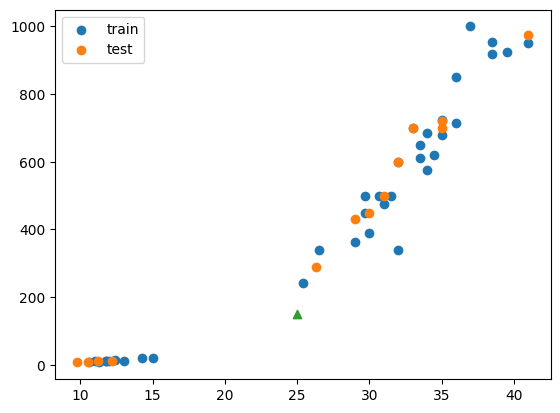

In [ ]:
# 25,150 위치를 시각화
# 모델이 예측한 5개의 포인트도 시각화
plt.scatter(np.array(x_train)[:,0],np.array(x_train)[:,1],label='train')
plt.scatter(np.array(x_test)[:,0],np.array(x_test)[:,1],label='test')
plt.scatter(25,150,marker="^")
plt.legend()
plt.show()

In [ ]:
# distance : 해당 객체와 군집 간의 거리 중 가까운 순으로
distance

array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
        138.32150953, 138.39320793, 140.00603558, 140.62090883,
        140.72046759, 140.80142045, 140.87753547, 140.99677301,
        141.96260071, 143.23581954, 143.7232062 , 144.10388614,
        190.00592096, 190.12890364, 213.03755537, 240.05207768,
        280.02856997, 300.03681441, 300.04166377, 325.0553799 ,
        350.03155572, 350.04641121, 350.05142479, 350.06035194,
        425.09528344, 450.05444115, 450.05444115, 460.07852591,
        470.09600083, 500.07224478, 530.09433123, 535.07569558,
        550.05817874, 550.05817874, 550.09090158, 564.1072593 ,
        570.08771255, 575.08694995, 700.08642324, 770.11833506,
        775.13563329, 800.159984  , 805.1131908 , 825.15513693,
        850.08470166]])

In [ ]:
indexes

array([[ 0, 48, 47, 45, 46, 44,  1, 41, 42, 43, 39, 38, 40, 36, 37, 35,
         2, 13,  3,  7,  4,  5,  8, 10,  6,  9, 11, 12, 20, 15, 14, 18,
        22, 19, 23, 21, 17, 16, 24, 27, 26, 25, 28, 30, 32, 34, 31, 33,
        29]])

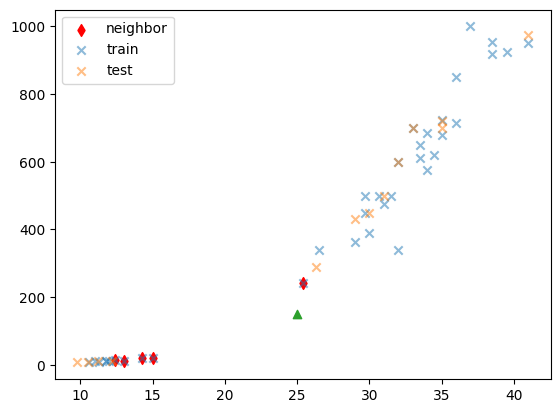

In [ ]:
# 예측 - 단위를 맞춰서 기준을 맞춰줌
# kneighbors() 가장 가까운 이웃까지의 거리와 이웃의 샘플 인덱스 획
distance, indexes = kn.kneighbors([(25,150)])
neighbors_points = np.array(x_train)[indexes[0]]
plt.scatter(neighbors_points[:,0],neighbors_points[:,1],label='neighbor',c='red',marker='d')
plt.scatter(np.array(x_train)[:,0],np.array(x_train)[:,1],label='train',alpha=0.5,marker='x')
plt.scatter(np.array(x_test)[:,0],np.array(x_test)[:,1],label='test',alpha=0.5,marker='x')
plt.scatter(25,150,marker="^")
plt.legend()
plt.show()

In [ ]:
# 표준 점수로 맞춰줌
# (x - min/std)
# x:epdlxj, min: 전체 평균 계, std:전체 표준 편차 계산

# train 데이터를 표준화
# 표준화된 데이터로 시각화를 하면 같은 모양의 그래프가 길어져야한다

x_train = np.array(x_train)
x_train_mean = x_train.mean(); x_train_std = x_train.std()
x_train_scaled = (x_train - x_train_mean) / x_train_std
sample = np.array((25,150))
sample_scaled = (sample - x_train_mean)/x_train_std
sample,sample_scaled

(array([ 25, 150]), array([-0.68571277, -0.28932155]))

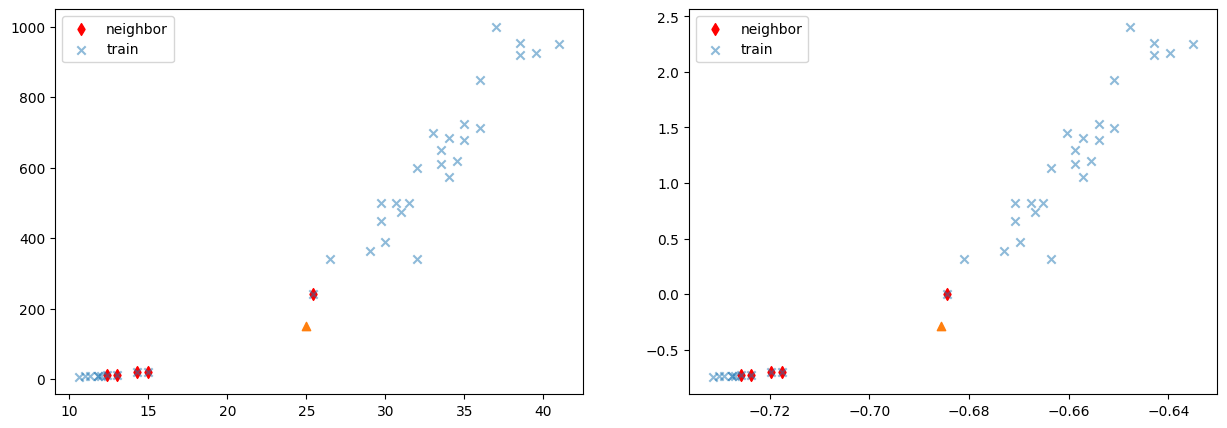

In [ ]:
# 예측
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
plt.figure(figsize=(15,5))
#원본시각화
distance, indexes = kn.kneighbors([(25,150)])
neighbor_points = np.array(x_train)[indexes[0]]
plt.subplot(1,2,1)
plt.scatter(neighbor_points[:,0],neighbor_points[:,1],label='neighbor',c='red',marker='d')
plt.scatter(np.array(x_train)[:,0],np.array(x_train)[:,1],label='train',alpha=0.5,marker='x')
plt.scatter(sample[0],sample[1],marker='^')
plt.legend()
kn = KNeighborsClassifier()
kn.fit(x_train_scaled,y_train)
# 스케일된 시각화
sample_scaled = (np.array((25,150)) - x_train_mean) / x_train_std
distance, indexes = kn.kneighbors([sample_scaled])
neighbor_points = x_train_scaled[indexes[0]]
plt.subplot(1,2,2)
plt.scatter(neighbor_points[:,0],neighbor_points[:,1],label='neighbor',c='red',marker='d')
plt.scatter(x_train_scaled[:,0],x_train_scaled[:,1],label='train',alpha=0.5,marker='x')
plt.scatter(sample_scaled[0],sample_scaled[1],marker='^')
plt.legend()
plt.show()

In [ ]:
# 스케일된 데이터
kn = KNeighborsClassifier()


1. 데이터(전처리가 완료된 무결성의 데이터)
  1-1 표준화(스케일)
  1-2 데이터 분할(학습용, 평가용, 테스트용),train,val,test
2. 적절한 모델 선택(분류, 회귀, 군집...)
3. 훈련
  3-1 최적화
4. 평가

if ) 평가 수치가 낮으면
- 모델 고정한 경우
 - 전처리 - 훈련용 파라메터 최적화 - 평가의 과정을 반복해서 최적의 수치
 - 모델을 고정하지 않은 경우
  - 기본 모델로 최적의 평가가 나오는 데이터 셋을 고정한 다음
  - 각 모델별로 비교 평가에서 최상의 모델 선택
  

배운 모델을 가지고 예측(분류)
 - 타이타기 생존자 예측

In [ ]:
import seaborn as sns
t_df = sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 학습용 데이터 (컬럼) :
# 정답 : survived
# 모델 : k-최근접 이웃 알고리즘

In [ ]:
# 1. 수치형 데이터만 처리
# 2. 결측치 처리
# 3. 스케일 표준화
# 4. 데이터 분리(학습, 테스트)
# 5. 모델 선택 - 학습
# 6. 평가

In [ ]:
temp = t_df.describe()
temp.index[1:]

Index(['mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [ ]:
# age - 성별,객실등급별 평균
t_df['age'] = t_df.groupby(['sex', 'pclass'])['age'].transform(lambda x: x.fillna(x.mean()))
temp = t_df.describe().T
temp

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
age,891.0,29.318643,13.281103,0.42,21.7500,26.507589,36.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


In [ ]:
train_df = t_df.loc[:, temp.index[1:]]
train_df.head()

,pclass,age,sibsp,parch,fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [ ]:
#표준화  (데이터 - 평균)/표준편차
for colname in train_df.columns:
  train_df[colname] = (train_df[colname] - temp.loc[colname,'mean']) / temp.loc[colname,'std']

In [ ]:
train_df.head(2)

,pclass,age,sibsp,parch,fare
0,0.826913,-0.551057,0.43255,-0.473408,-0.502163
1,-1.565228,0.653662,0.43255,-0.473408,0.786404


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_df,t_df.loc[:,'survived'] ,
                                                 test_size=0.2,
                                                 stratify=t_df.loc[:,'survived'],random_state=15)

In [ ]:
# model select
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
# 학습
kn.fit(x_train,y_train)
# 평가
kn.score(x_test,y_test)

0.7318435754189944

In [ ]:
# 추가작업  성별
# t_df['label_sex'] = t_df['sex'].apply(lambda x: 1 if x == 'female' else 0)
temp = pd.get_dummies(t_df['sex'],prefix='sex').astype(int)
new_tf = pd.concat([t_df,temp], axis=1)
temp = new_tf.describe().T
train_df = new_tf.loc[:, new_tf.describe().T.index[1:]]

# #표준화  (데이터 - 평균)/표준편차
for colname in train_df.columns:
  train_df[colname] = (train_df[colname] - temp.loc[colname,'mean']) / temp.loc[colname,'std']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_df,t_df.loc[:,'survived'] ,
                                                 test_size=0.2,
                                                 stratify=t_df.loc[:,'survived'],random_state=15)
# model select
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
# 학습
kn.fit(x_train,y_train)
# 평가
kn.score(x_test,y_test)

0.8324022346368715